# Pymaceuticals Inc.
---

### Analysis
1.The Standard Deviation is high for Drug Ketapril and hence its behaviour cannot be predicted.
2.In reference to the correlation between Capomulin with average weight and final tumor volume,
the value is 0.84, meaning that there is a strong positive correlation between the two variables. 
The r-squared value of 0.71 indicates that the final tumor volume could be predicted by using the average weight of a mouse. 
3.The most given drug to mice was Capomulin and the least was Propriva.
4.As per the line graph for drug Capomulin value l509, the tumor volume seems to be getting less by timepoint, which proves that drug might be effective.

In [33]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"



In [34]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(study_results, mouse_metadata, how='outer', on=['Mouse ID', 'Mouse ID'])


# Display the data table for preview
merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
total_mice = len(merged_data_df['Mouse ID'].unique())
print(f' {total_mice}')

 249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice=merged_data_df.duplicated(subset=['Mouse ID','Timepoint'],keep=False)
duplicated_mice

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool

In [5]:
# Locate all the duplicated mice and return Mouse ID
duplicated_mice_ID = merged_data_df.loc[duplicated_mice, 'Mouse ID'].unique()

In [6]:
duplicated_mice_ID

array(['g989'], dtype=object)

In [7]:
# Get all the data for the duplicate mouse ID. 
duplicated_mice_ID_data = merged_data_df.loc[merged_data_df['Mouse ID'] == duplicated_mice_ID[0]]
duplicated_mice_ID_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
analysis_data_df = merged_data_df.drop(duplicated_mice_ID_data.index)


In [9]:
# Checking the number of mice in the clean DataFrame.
no_mice_analysis = len(analysis_data_df['Mouse ID'].unique())
print(no_mice_analysis)

248


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mice_grouped_regimen=analysis_data_df.groupby(['Drug Regimen'])
mice_grouped_regimen

In [11]:
#Mean
mean=mice_grouped_regimen['Tumor Volume (mm3)'].mean()

In [12]:
mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [13]:
#Median
median=mice_grouped_regimen['Tumor Volume (mm3)'].median()

In [14]:
#Variance
var=mice_grouped_regimen['Tumor Volume (mm3)'].var()

In [15]:
#Std Devaiation
std=mice_grouped_regimen['Tumor Volume (mm3)'].std()

In [16]:
#Standard error of mean
sem=mice_grouped_regimen['Tumor Volume (mm3)'].sem()

In [17]:
# Assemble the resulting series into a single summary DataFrame

# Combine all statistics computation together
summary_statistics_df = pd.DataFrame({
    'mean': mean,
    'median': median,
    'Variance': var,
    'Standard deviation': std,
    'SEM': sem
})


In [18]:

print('Method I')
summary_statistics_df

Method I


,mean,median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# # A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

In [20]:
summary_table = mice_grouped_regimen['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

summary_agg_df = summary_table.rename(columns={
    'mean':'Mean',
    'median': 'Median',
    'var': 'Variance',
    'std': 'Standard deviation',
    'sem': 'SEM'
})
print('Method II')
summary_agg_df

Method II


,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [22]:
# Calculate number of mice per Drug Regimen
mice_per_regimen = mice_grouped_regimen['Mouse ID'].count().sort_values(ascending=False)
mice_per_regimen

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Mouse ID, dtype: int64

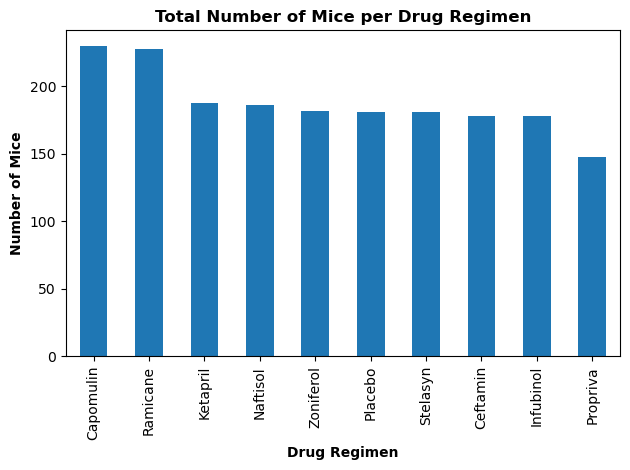

In [23]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Generate a bar plot showing the total number of mice for each treatment 
bar_mice_per_regimen = mice_per_regimen.plot(kind='bar', width=0.5)

# Set x/y label, title
bar_mice_per_regimen.set_title(label='Total Number of Mice per Drug Regimen', fontweight = 'bold')
bar_mice_per_regimen.set_xlabel('Drug Regimen', fontweight = 'bold')
bar_mice_per_regimen.set_ylabel('Number of Mice', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
bar_mice_per_regimen.figure.savefig('pd_bar_mice_per_regimen.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

<Axes: title={'center': 'Total Mice per drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of mice'>

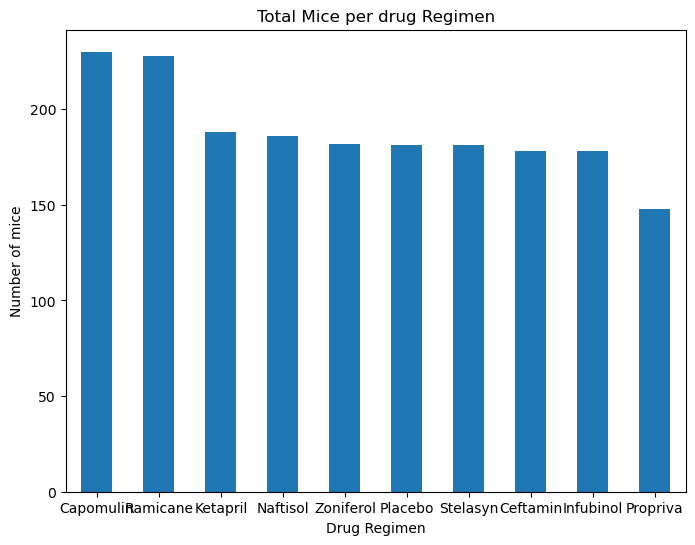

In [24]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Set x axis
 
mice_per_regimen.plot(x='Drug Regimen', y='Number of Mice', kind='bar', title="Total Mice per drug Regimen", figsize=(8,6), ylabel='Number of mice', rot=0)


In [42]:
#Get Data for Sex
# Calculate number of mice for each sex
sex_mice = analysis_data_df.groupby('Sex')['Sex'].count()
sex_mice

Sex
Female    922
Male      958
Name: Sex, dtype: int64

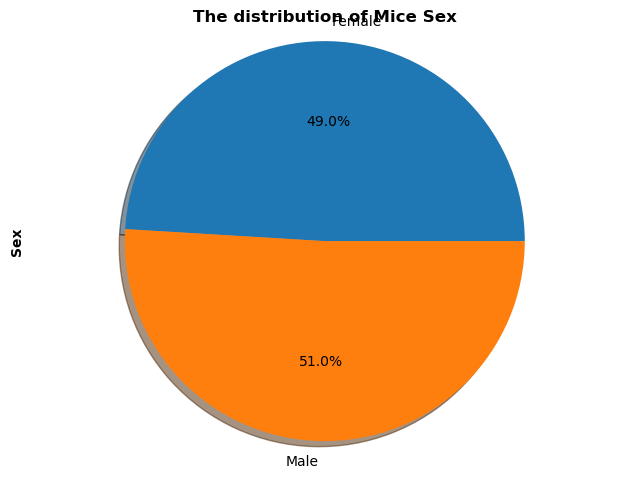

In [64]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plot = sex_mice.plot.pie(legend=False, autopct='%1.1f%%', explode=(0, 0), shadow=True,
                    startangle=0)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set x/y label, title
plot.set_title(label='The distribution of Mice Sex', fontweight = 'bold')
plot.set_ylabel('Sex', fontweight = 'bold')

# Save bar graph to Images folder
plt.tight_layout()
plot.figure.savefig('mice_sex.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()


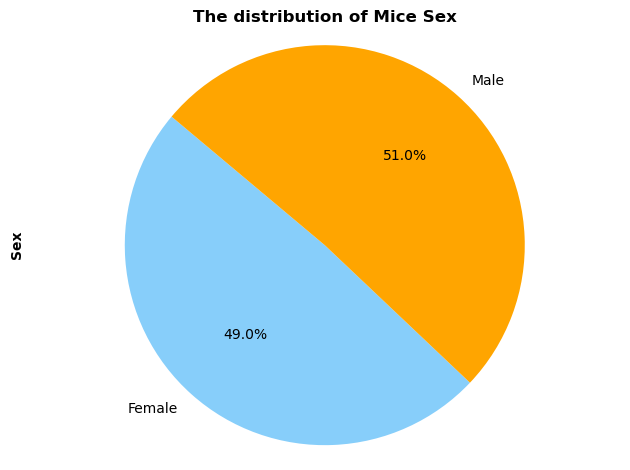

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Set x_axis and colors
sex = sex_mice.index
colors = ['lightskyblue','orange']

# Create pie chart
plot_1 = plt.pie(sex_mice, labels=sex_mice.index, autopct="%1.1f%%", colors=colors, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Set x/y label, title
plt.title('The distribution of Mice Sex', fontweight = 'bold')
plt.ylabel('Sex', fontweight = 'bold')

# Save an image of pie chart
plt.tight_layout()
plt.savefig('mice_sex_plt.png')

# Present the bar chart
plt.show()

# To close pyplot
plt.close()

In [ ]:
# Quartiles, Outliers and Boxplots

In [146]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Calculate the final tumor volume of each mouse


# Start by getting the last (greatest) timepoint for each mouse
final_tumor_vol = analysis_data_df.groupby(['Drug Regimen', 'Mouse ID']).last()[['Timepoint', 'Tumor Volume (mm3)']]
final_tumor_df = final_tumor_vol.reset_index()



#print(final_tumor_volume['Timepoint','Tumor Volume (mm3)'].iloc[-1])

#final_tumor_df.loc[len(final_tumor_df['Timepoint'])-1, :]


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [147]:
final_tumor_df

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [163]:
# Put treatments into a list for for loop (and later for plot labels)
regimen=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_vol_list=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in regimen:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol=final_tumor_df.loc[final_tumor_df['Drug Regimen']==drug,'Tumor Volume (mm3)']
    final_tumor_vol_list.append(final_tumor_vol)
    
    #Calcuate IQR
    
    quartiles = final_tumor_vol.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    mean = final_tumor_vol.mean()
    iqr = upperq-lowerq    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) 
                  | (final_tumor_vol > upper_bound)]
    
   
    # Determine outliers using upper and lower bounds

     # Print out the result
    print(f"{drug} Regimen")
    print(f"Final tumor volume(mm3) for {drug} below {round(lower_bound,2)} could be outliers.")
    print(f"Final tumor volume(mm3) for {drug} above {round(upper_bound,2)} could be outliers.")
    print(f"Average tumor volume(mm3) for {drug} is: {round(mean,2)}")
    print(f"Number of outliers for {drug} is: {outliers.count()}")
    if outliers.count() > 0:
        for i in outliers.index:
            print(f'Outlier final tumor volume(mm3) is {round(outliers[i], 2)}')
    print('----------------------------------------------------------')



Capomulin Regimen
Final tumor volume(mm3) for Capomulin below 20.7 could be outliers.
Final tumor volume(mm3) for Capomulin above 51.83 could be outliers.
Average tumor volume(mm3) for Capomulin is: 36.67
Number of outliers for Capomulin is: 0
----------------------------------------------------------
Ramicane Regimen
Final tumor volume(mm3) for Ramicane below 17.91 could be outliers.
Final tumor volume(mm3) for Ramicane above 54.31 could be outliers.
Average tumor volume(mm3) for Ramicane is: 36.19
Number of outliers for Ramicane is: 0
----------------------------------------------------------
Infubinol Regimen
Final tumor volume(mm3) for Infubinol below 36.83 could be outliers.
Final tumor volume(mm3) for Infubinol above 82.74 could be outliers.
Average tumor volume(mm3) for Infubinol is: 58.18
Number of outliers for Infubinol is: 1
Outlier final tumor volume(mm3) is 36.32
----------------------------------------------------------
Ceftamin Regimen
Final tumor volume(mm3) for Ceftamin

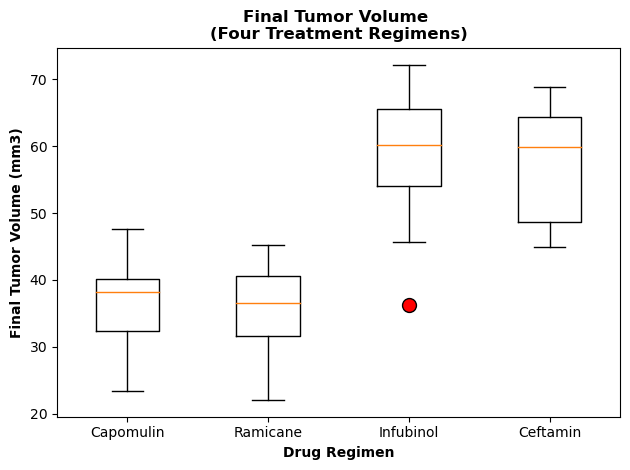

In [93]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, final_tumor_plot = plt.subplots()
final_tumor_plot.boxplot(final_tumor_vol_list, labels=regimen, flierprops={'markerfacecolor':'r','markersize': 10})

# Set x/y label, title
final_tumor_plot.set_title('Final Tumor Volume \n(Four Treatment Regimens)', fontweight='bold')
final_tumor_plot.set_xlabel('Drug Regimen', fontweight='bold')
final_tumor_plot.set_ylabel('Final Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.tight_layout()
final_tumor_plot.figure.savefig('final_tumor_boxplot.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()


## Line and Scatter Plots

In [127]:
Capomulin_df.value_counts()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites  Drug Regimen  Sex     Age_months  Weight (g)
b128      0          45.000000           0                 Capomulin     Female  9           22            1
r944      35         40.401765           2                 Capomulin     Male    12          25            1
          45         41.581521           2                 Capomulin     Male    12          25            1
s185      0          45.000000           0                 Capomulin     Female  3           17            1
          5          43.878496           0                 Capomulin     Female  3           17            1
                                                                                                          ..
j246      25         44.555226           0                 Capomulin     Female  21          21            1
          30         38.044082           1                 Capomulin     Female  21          21            1
          35         38.

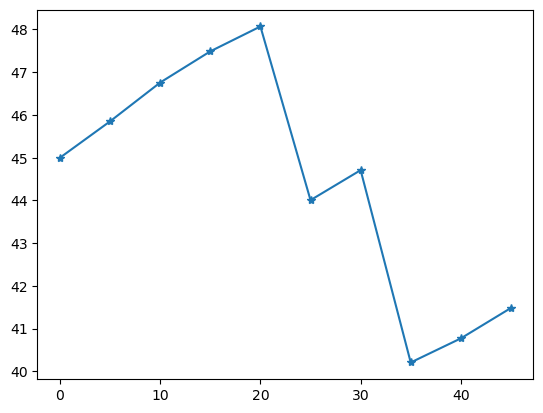

In [128]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Generate dataframe only in Capomulin Regimen
Capomulin_df = analysis_data_df.loc[analysis_data_df['Drug Regimen'] == 'Capomulin']
mouse_id='l509'
mouse_df=Capomulin_df.loc[Capomulin_df['Mouse ID']==mouse_id]
mouse_df

time_tumor=plt.plot(mouse_df['Timepoint'],mouse_df['Tumor Volume (mm3)'],marker='*')
plt.show()
plt.close()

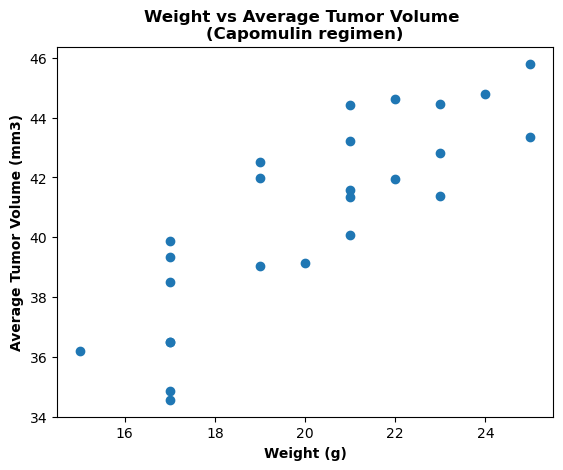

In [160]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

Capomulin_gp = Capomulin_df.groupby('Mouse ID')
mice_weight_avg = Capomulin_gp['Weight (g)'].mean()
mice_tumor_avg = Capomulin_gp['Tumor Volume (mm3)'].mean()

# Generate a scatter plot
plt.scatter(mice_weight_avg, mice_tumor_avg)

# Set x/y label, title
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('scatter_weight_tumor.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

## Correlation and Regression

In [32]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation between mouse weight and tumor vol is 0.84
The r-squared is: 0.71


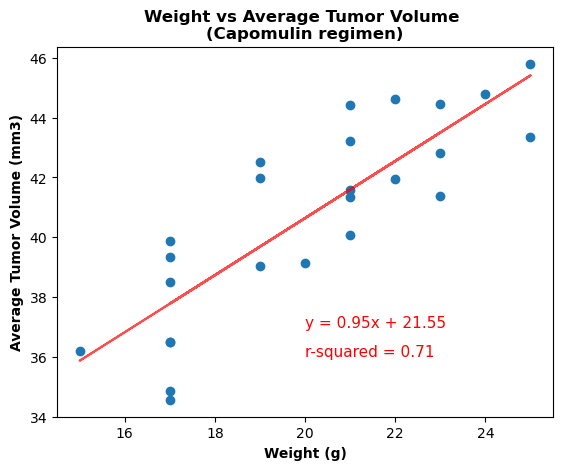

In [162]:
# Define x,y values
x_values = mice_weight_avg
y_values = mice_tumor_avg

# Calculate the correlation
correlation = round(st.pearsonr(x_values, y_values)[0],2)
print(f"The correlation between mouse weight and tumor vol is {correlation}")

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")

# y = mx + b
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, color='r', alpha=0.7)

# Plot the Annotation in the graph 
plt.annotate(line_eq,(20,37), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_squared}', (20,36), fontsize=11, color="red")

# Define title and x/y labels
plt.title('Weight vs Average Tumor Volume \n(Capomulin regimen)', fontweight='bold')
plt.xlabel('Weight (g)', fontweight='bold')
plt.ylabel('Average Tumor Volume (mm3)', fontweight='bold')

# Save box plot graph to Images folder
plt.savefig('scatter_weight_tumor_linear.png')

# Present the box plot chart
plt.show()

# To close pyplot
plt.close()